# 🌱 Vivinate Program Tracker – Prototype App (Google Colab Version)

This notebook is a working prototype of a program tracking app developed as part of Khaya Yankey’s training for Vivinate Farms. It is designed to support sustainable farming programs like mushroom cultivation workshops by managing participants, sessions, tasks, and field data.

## ✅ Key Features
- **User Profiles**: Create and store participant info with location and role
- **Session Scheduling**: Add and view sessions with color-coded types
- **Attendance Tracking**: Mark attendance per session and visualize with pie charts
- **Task Checklists**: Track task completion for each user
- **Progress Visualization**: Bar charts and filtered views by task category
- **Community Map**: View participant locations on a live interactive map
- **Private Admin Notes**: Record hidden notes per participant
- **Cost Tracker**: Log categorized expenses and materials
- **Income Tracker**: Record earnings per user
- **ROI Chart**: Compare income vs. cost across participants

## 🔍 Purpose
This app was created to streamline program monitoring, improve field data tracking, and support decision-making for both training and sustainability assessments.

## 🧪 Status
All features are actively tested and functional inside Google Colab. Future steps may include deployment, file export, or integration with a database or mobile UI.

## 👩🏽‍🌾 Author
**Khaya Yankey**  
Vivinate Farms Training Cohort  
Program: Quantum-AI-Enhanced Sustainable Agriculture Tools  


In [1]:
# Feature: Google Forms-style User Profile Input
from IPython.display import display, clear_output
import ipywidgets as widgets

# Create the form widgets
name_input = widgets.Text(
    value='',
    placeholder='Enter your name',
    description='Name:',
    style={'description_width': 'initial'},
)

role_input = widgets.Dropdown(
    options=['Participant', 'Admin'],
    value='Participant',
    description='Role:',
    style={'description_width': 'initial'},
)

location_input = widgets.Text(
    value='',
    placeholder='e.g. Farm A, Region X',
    description='Location:',
    style={'description_width': 'initial'},
)

submit_button = widgets.Button(
    description='Submit Profile',
    button_style='success',
    tooltip='Click to save profile',
    icon='check'
)

output = widgets.Output()
profile_data = []

# Handle submit
def on_submit_clicked(b):
    with output:
        clear_output()
        profile = {
            'Name': name_input.value.strip(),
            'Role': role_input.value,
            'Location': location_input.value.strip()
        }
        if profile['Name'] and profile['Location']:
            profile_data.append(profile)
            print("✅ Profile Saved:")
            print(profile)
        else:
            print("⚠️ Please fill in all fields.")

submit_button.on_click(on_submit_clicked)

# Display the form
form_items = widgets.VBox([name_input, role_input, location_input, submit_button, output])
display(form_items)


In [2]:
# Attendance Tracker

from datetime import date

# Only proceed if profiles exist
if not profile_data:
    print("⚠️ No profiles available. Add some first using the profile form.")
else:
    # List of names to check attendance
    names = [p['Name'] for p in profile_data]
    checkboxes = [widgets.Checkbox(value=False, description=name) for name in names]
    submit_attendance = widgets.Button(
        description='Submit Attendance',
        button_style='info',
        tooltip='Save attendance',
        icon='clipboard-check'
    )
    attendance_output = widgets.Output()
    attendance_records = []

    def submit_attendance_handler(b):
        with attendance_output:
            clear_output()
            today = str(date.today())
            present = [cb.description for cb in checkboxes if cb.value]
            record = {
                'Date': today,
                'Present': present
            }
            attendance_records.append(record)
            print(f"✅ Attendance for {today} saved!")
            print("Present:", present)

    submit_attendance.on_click(submit_attendance_handler)

    # Display attendance checkboxes
    attendance_box = widgets.VBox(checkboxes + [submit_attendance, attendance_output])
    display(attendance_box)


In [3]:
# Session Calendar & Scheduling

import datetime

session_title_input = widgets.Text(
    placeholder='e.g. Mushroom Workshop #1',
    description='Session Title:',
    style={'description_width': 'initial'},
)

session_date_input = widgets.DatePicker(
    description='Date:',
    disabled=False,
    style={'description_width': 'initial'}
)

add_session_button = widgets.Button(
    description='Add Session',
    button_style='primary',
    icon='calendar-plus'
)

calendar_output = widgets.Output()
session_schedule = []

def on_add_session(b):
    with calendar_output:
        clear_output()
        title = session_title_input.value.strip()
        session_date = session_date_input.value
        if title and session_date:
            session = {
                'Title': title,
                'Date': str(session_date)
            }
            session_schedule.append(session)
            session_schedule.sort(key=lambda x: x['Date'])  # Sort by date
            print("📅 Upcoming Sessions:")
            for s in session_schedule:
                print(f"{s['Date']}: {s['Title']}")
        else:
            print("⚠️ Please enter both a title and date.")

add_session_button.on_click(on_add_session)

calendar_form = widgets.VBox([session_title_input, session_date_input, add_session_button, calendar_output])
display(calendar_form)


In [4]:
# Upgraded Attendance Tracker (linked to sessions)

if not session_schedule:
    print("⚠️ No sessions scheduled. Add sessions first.")
elif not profile_data:
    print("⚠️ No profiles available. Use the profile form first.")
else:
    # Select a session from scheduled ones
    session_titles = [s['Title'] for s in session_schedule]
    session_dropdown = widgets.Dropdown(
        options=session_titles,
        description='Select Session:',
        style={'description_width': 'initial'}
    )

    # Create attendance checkboxes
    names = [p['Name'] for p in profile_data]
    checkboxes = [widgets.Checkbox(value=False, description=name) for name in names]

    submit_attendance = widgets.Button(
        description='Save Attendance',
        button_style='info',
        icon='check-circle'
    )

    attendance_output = widgets.Output()
    linked_attendance = []  # Stores attendance per session

    def submit_attendance_handler(b):
        with attendance_output:
            clear_output()
            selected_title = session_dropdown.value
            present = [cb.description for cb in checkboxes if cb.value]
            record = {
                'Session': selected_title,
                'Date': next((s['Date'] for s in session_schedule if s['Title'] == selected_title), str(date.today())),
                'Present': present
            }
            linked_attendance.append(record)
            print(f"✅ Attendance saved for: {selected_title}")
            print("Present:", present)

    submit_attendance.on_click(submit_attendance_handler)

    # Display linked tracker
    display(widgets.VBox([
        widgets.HTML("<b>Mark attendance for a specific session:</b>"),
        session_dropdown,
        widgets.VBox(checkboxes),
        submit_attendance,
        attendance_output
    ]))


In [5]:
# Add this to your calendar input section (above or below session_title_input)
session_type_input = widgets.Dropdown(
    options=['Workshop 🟥', 'Field Visit 🟦', 'Webinar 🟩', 'Community Meeting 🟨'],
    description='Type:',
    style={'description_width': 'initial'}
)


In [6]:
def on_add_session(b):
    with calendar_output:
        clear_output()
        title = session_title_input.value.strip()
        session_date = session_date_input.value
        session_type = session_type_input.value
        if title and session_date and session_type:
            session = {
                'Title': title,
                'Date': str(session_date),
                'Type': session_type
            }
            session_schedule.append(session)
            session_schedule.sort(key=lambda x: x['Date'])
            print("📅 Upcoming Sessions:")
            for s in session_schedule:
                print(f"{s['Date']}: {s['Title']} ({s['Type']})")
        else:
            print("⚠️ Please fill in all fields.")


In [7]:
calendar_form = widgets.VBox([
    session_title_input,
    session_date_input,
    session_type_input,
    add_session_button,
    calendar_output
])


In [8]:
# Feature 4: Personal Task Checklist

# Example task list for your programs
default_tasks = [
    'Attend Intro Workshop',
    'Collect Mushroom Spores',
    'Prepare Growing Substrate',
    'Set Up Grow Bags',
    'Log First Growth Data',
    'Complete Feedback Survey'
]

# Create user dropdown
if not profile_data:
    print("⚠️ Please add user profiles first.")
else:
    user_names = [p['Name'] for p in profile_data]
    selected_user = widgets.Dropdown(
        options=user_names,
        description='Participant:',
        style={'description_width': 'initial'}
    )

    # Create checklist
    task_checkboxes = [widgets.Checkbox(value=False, description=task) for task in default_tasks]

    # Save button
    save_tasks_button = widgets.Button(
        description='Save Progress',
        button_style='success',
        icon='save'
    )

    task_output = widget_


NameError: name 'widget_' is not defined

In [9]:
# Feature 4: Personal Task Checklist

# Example task list for your programs
default_tasks = [
    'Attend Intro Workshop',
    'Collect Mushroom Spores',
    'Prepare Growing Substrate',
    'Set Up Grow Bags',
    'Log First Growth Data',
    'Complete Feedback Survey'
]

# Create user dropdown
if not profile_data:
    print("⚠️ Please add user profiles first.")
else:
    user_names = [p['Name'] for p in profile_data]
    selected_user = widgets.Dropdown(
        options=user_names,
        description='Participant:',
        style={'description_width': 'initial'}
    )

    # Create checklist
    task_checkboxes = [widgets.Checkbox(value=False, description=task) for task in default_tasks]

    # Save button
    save_tasks_button = widgets.Button(
        description='Save Progress',
        button_style='success',
        icon='save'
    )

    task_output = widgets.Output()
    user_tasks = {}  # Dictionary: Name -> [Completed tasks]

    def save_tasks_handler(b):
        with task_output:
            clear_output()
            name = selected_user.value
            completed = [cb.description for cb in task_checkboxes if cb.value]
            user_tasks[name] = completed
            print(f"✅ Progress saved for {name}")
            print("Tasks Completed:", completed)

    save_tasks_button.on_click(save_tasks_handler)

    # Show interface
    display(widgets.VBox([
        widgets.HTML("<b>Track tasks for each participant:</b>"),
        selected_user,
        widgets.VBox(task_checkboxes),
        save_tasks_button,
        task_output
    ]))


/tmp/ipython-input-10-3892974154.py:25: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


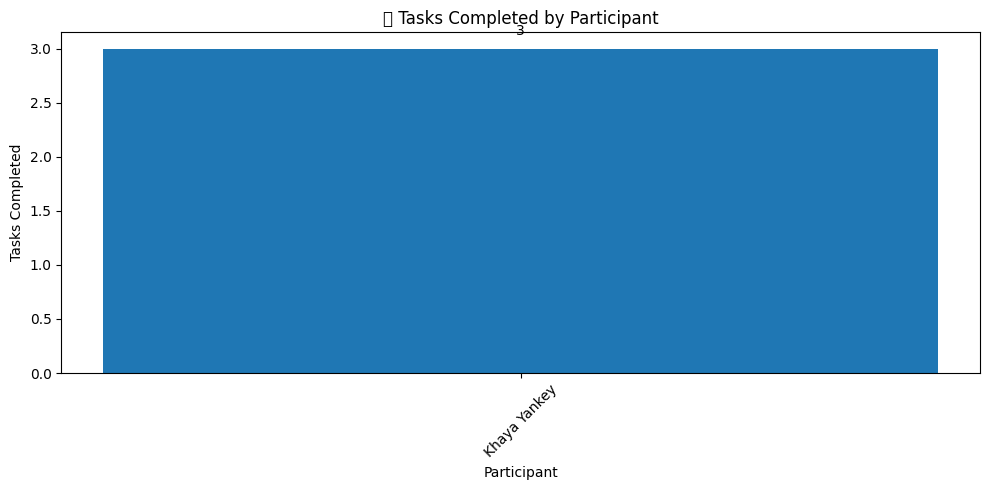

In [10]:
# Feature 5: Progress Visualization - Bar Chart

import matplotlib.pyplot as plt

# Check if there's data to show
if not user_tasks:
    print("⚠️ No task progress found. Use the checklist first.")
else:
    names = list(user_tasks.keys())
    completed_counts = [len(user_tasks[name]) for name in names]

    # Create bar chart
    plt.figure(figsize=(10, 5))
    bars = plt.bar(names, completed_counts)

    # Add labels above bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.1, int(yval), ha='center', va='bottom')

    plt.title("✅ Tasks Completed by Participant")
    plt.xlabel("Participant")
    plt.ylabel("Tasks Completed")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [11]:
# Attendance Pie Chart (per session)

if not linked_attendance:
    print("⚠️ No attendance records yet. Submit some attendance first.")
else:
    # Create dropdown to select session
    session_options = [rec['Session'] for rec in linked_attendance]
    session_select = widgets.Dropdown(
        options=session_options,
        description='Pick Session:',
        style={'description_width': 'initial'}
    )

    show_chart_btn = widgets.Button(
        description='Show Attendance Chart',
        button_style='warning',
        icon='chart-pie'
    )

    pie_output = widgets.Output()

    def show_attendance_chart(b):
        with pie_output:
            clear_output()
            selected = session_select.value
            record = next((r for r in linked_attendance if r['Session'] == selected), None)
            if not record:
                print("⚠️ No attendance data found.")
                return

            present = record['Present']
            all_names = [p['Name'] for p in profile_data]
            absent = [name for name in all_names if name not in present]

            labels = present + absent
            sizes = [1]*len(present) + [1]*len(absent)
            colors = ['lightgreen']*len(present) + ['lightgray']*len(absent)

            plt.figure(figsize=(6,6))
            plt.pie(sizes, labels=labels, colors=colors, startangle=140, autopct='%1.0f%%')
            plt.title(f"Attendance for: {selected}")
            plt.axis('equal')
            plt.show()

    show_chart_btn.on_click(show_attendance_chart)
    display(widgets.VBox([session_select, show_chart_btn, pie_output]))


In [12]:
default_tasks = [
    {'name': 'Attend Intro Workshop', 'category': 'Workshop'},
    {'name': 'Collect Mushroom Spores', 'category': 'Field Task'},
    {'name': 'Prepare Growing Substrate', 'category': 'Field Task'},
    {'name': 'Set Up Grow Bags', 'category': 'Field Task'},
    {'name': 'Log First Growth Data', 'category': 'Analysis'},
    {'name': 'Complete Feedback Survey', 'category': 'Survey'}
]


In [13]:
# Replace old checklist line:
task_checkboxes = [widgets.Checkbox(value=False, description=task['name']) for task in default_tasks]


In [14]:
completed = [cb.description for cb in task_checkboxes if cb.value]


In [15]:
# Filtered Task Completion Chart by Category

# Extract all categories
task_categories = sorted(list(set(t['category'] for t in default_tasks)))

category_dropdown = widgets.Dropdown(
    options=task_categories,
    description='Filter by Category:',
    style={'description_width': 'initial'}
)

show_filter_chart_btn = widgets.Button(
    description='Show Filtered Chart',
    button_style='info',
    icon='filter'
)

filter_output = widgets.Output()

def show_filtered_chart(b):
    with filter_output:
        clear_output()
        selected_category = category_dropdown.value
        task_names = [t['name'] for t in default_tasks if t['category'] == selected_category]

        # Tally completed tasks per user, matching this category only
        counts = []
        names = []
        for name in user_tasks:
            completed = user_tasks[name]
            count = sum(1 for task in completed if task in task_names)
            if count > 0:
                names.append(name)
                counts.append(count)

        if not names:
            print("No matching task data yet.")
            return

        plt.figure(figsize=(8,4))
        bars = plt.bar(names, counts, color='skyblue')
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.1, int(yval), ha='center')
        plt.title(f"Tasks Completed in: {selected_category}")
        plt.xlabel("Participant")
        plt.ylabel("Tasks Completed")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

show_filter_chart_btn.on_click(show_filtered_chart)
display(widgets.VBox([category_dropdown, show_filter_chart_btn, filter_output]))


In [16]:
!pip install folium


In [17]:
# Feature 6: Google Maps View of Participant Locations

import folium
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="vivinate-map-app")
map_output = widgets.Output()

# Filter valid profiles with location data
valid_profiles = [p for p in profile_data if p.get('Location')]

# Build a map centered on an average location (or default)
m = folium.Map(location=[0, 0], zoom_start=2)

for p in valid_profiles:
    location_name = p['Location']
    try:
        time.sleep(1)  # avoid rate limit
        loc = geolocator.geocode(location_name)
        if loc:
            folium.Marker(
                [loc.latitude, loc.longitude],
                popup=f"{p['Name']} ({p['Role']}) - {location_name}",
                tooltip=p['Name']
            ).add_to(m)
    except Exception as e:
        print(f"❌ Could not locate: {location_name} — {e}")

# Display the map
with map_output:
    clear_output()
    display(m)

display(map_output)


Output()

In [18]:
# Structured Location Inputs
city_input = widgets.Text(
    value='',
    placeholder='e.g. Tamale',
    description='City/Town:',
    style={'description_width': 'initial'}
)

region_input = widgets.Text(
    value='',
    placeholder='e.g. Northern Region',
    description='Region/State:',
    style={'description_width': 'initial'}
)


In [19]:
form_items = widgets.VBox([name_input, role_input, location_input, submit_button, output])


In [20]:
form_items = widgets.VBox([
    name_input,
    role_input,
    city_input,
    region_input,
    submit_button,
    output
])


In [21]:
'Location': f"{city_input.value.strip()}, {region_input.value.strip()}"


SyntaxError: illegal target for annotation (ipython-input-21-981487478.py, line 1)

In [22]:
def on_submit_clicked(b):
    with output:
        clear_output()
        profile = {
            'Name': name_input.value.strip(),
            'Role': role_input.value,
            'Location': f"{city_input.value.strip()}, {region_input.value.strip()}"
        }
        if profile['Name'] and city_input.value.strip() and region_input.value.strip():
            profile_data.append(profile)
            print("✅ Profile Saved:")
            print(profile)
        else:
            print("⚠️ Please fill in all fields.")


In [23]:
# Feature 7: Admin Notes Panel

admin_output = widgets.Output()
admin_notes = {}  # Stores notes: Name -> Note

# Only show users if we have profiles
if not profile_data:
    print("⚠️ Please create participant profiles first.")
else:
    user_dropdown = widgets.Dropdown(
        options=[p['Name'] for p in profile_data],
        description='Select User:',
        style={'description_width': 'initial'}
    )

    notes_area = widgets.Textarea(
        value='',
        placeholder='Write private notes here...',
        description='Admin Notes:',
        layout=widgets.Layout(width='100%', height='100px'),
        style={'description_width': 'initial'}
    )

    save_notes_btn = widgets.Button(
        description='Save Notes',
        button_style='info',
        icon='save'
    )

    def update_notes_display(change):
        name = user_dropdown.value
        current_note = admin_notes.get(name, '')
        notes_area.value = current_note

    user_dropdown.observe(update_notes_display, names='value')

    def save_notes_handler(b):
        with admin_output:
            clear_output()
            name = user_dropdown.value
            admin_notes[name] = notes_area.value.strip()
            print(f"✅ Notes saved for {name}.")

    save_notes_btn.on_click(save_notes_handler)

    display(widgets.VBox([
        widgets.HTML("<b>Private Admin Notes (not visible to users):</b>"),
        user_dropdown,
        notes_area,
        save_notes_btn,
        admin_output
    ]))


In [24]:
# Feature 8: Cost Tracker

cost_data = {}  # Dictionary: Name -> List of costs

cost_output = widgets.Output()

if not profile_data:
    print("⚠️ Add participant profiles first.")
else:
    user_select = widgets.Dropdown(
        options=[p['Name'] for p in profile_data],
        description='Participant:',
        style={'description_width': 'initial'}
    )

    item_input = widgets.Text(
        placeholder='e.g. Spawn kit',
        description='Item:',
        style={'description_width': 'initial'}
    )

    amount_input = widgets.FloatText(
        value=0.0,
        description='Cost (GH₵):',
        style={'description_width': 'initial'}
    )

    add_cost_btn = widgets.Button(
        description='Add Cost',
        button_style='primary',
        icon='plus'
    )

    def add_cost_handler(b):
        with cost_output:
            clear_output()
            name = user_select.value
            item = item_input.value.strip()
            amount = amount_input.value
            if not item or amount <= 0:
                print("⚠️ Enter valid item and cost.")
                return

            if name not in cost_data:
                cost_data[name] = []
            cost_data[name].append({'item': item, 'amount': amount})

            # Display summary
            print(f"💰 Cost log for {name}:")
            total = 0
            for entry in cost_data[name]:
                print(f"- {entry['item']}: GH₵ {entry['amount']:.2f}")
                total += entry['amount']
            print(f"📊 Total Spent: GH₵ {total:.2f}")

            # Reset inputs
            item_input.value = ''
            amount_input.value = 0.0

    add_cost_btn.on_click(add_cost_handler)

    # Display interface
    display(widgets.VBox([
        widgets.HTML("<b>Track materials & costs by participant:</b>"),
        user_select,
        item_input,
        amount_input,
        add_cost_btn,
        cost_output
    ]))


In [25]:
category_input = widgets.Dropdown(
    options=['Tools', 'Transport', 'Materials', 'Labor', 'Water', 'Other'],
    description='Category:',
    style={'description_width': 'initial'}
)


In [26]:
cost_data[name].append({
    'item': item,
    'amount': amount,
    'category': category_input.value
})


NameError: name 'name' is not defined

In [27]:
# FULL FEATURE 8: Cost Tracker with Categories + ROI Chart

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- In-Memory Storage ---
cost_data = {}       # Name -> list of cost entries
income_data = {}     # Name -> income float
profile_data = [{'Name': 'Ama', 'Role': 'Participant', 'Location': 'Kumasi, Ashanti Region'},
                {'Name': 'Kwame', 'Role': 'Participant', 'Location': 'Tamale, Northern Region'}]  # Example users

# --- Cost Tracker Interface ---
cost_output = widgets.Output()

user_select = widgets.Dropdown(
    options=[p['Name'] for p in profile_data],
    description='Participant:',
    style={'description_width': 'initial'}
)

item_input = widgets.Text(
    placeholder='e.g. Spawn kit',
    description='Item:',
    style={'description_width': 'initial'}
)

amount_input = widgets.FloatText(
    value=0.0,
    description='Cost (GH₵):',
    style={'description_width': 'initial'}
)

category_input = widgets.Dropdown(
    options=['Tools', 'Transport', 'Materials', 'Labor', 'Water', 'Other'],
    description='Category:',
    style={'description_width': 'initial'}
)

add_cost_btn = widgets.Button(
    description='Add Cost',
    button_style='primary',
    icon='plus'
)

def add_cost_handler(b):
    with cost_output:
        clear_output()
        name = user_select.value
        item = item_input.value.strip()
        amount = amount_input.value
        category = category_input.value
        if not item or amount <= 0:
            print("⚠️ Enter valid item and cost.")
            return
        if name not in cost_data:
            cost_data[name] = []
        cost_data[name].append({'item': item, 'amount': amount, 'category': category})

        # Display summary
        print(f"💰 Cost log for {name}:")
        total = 0
        for entry in cost_data[name]:
            print(f"- {entry['item']} ({entry['category']}): GH₵ {entry['amount']:.2f}")
            total += entry['amount']
        print(f"📊 Total Spent: GH₵ {total:.2f}")
        item_input.value = ''
        amount_input.value = 0.0

add_cost_btn.on_click(add_cost_handler)

display(widgets.VBox([
    widgets.HTML("<h3>🔧 Track Materials & Costs by Participant</h3>"),
    user_select,
    item_input,
    amount_input,
    category_input,
    add_cost_btn,
    cost_output
]))

# --- Income Input Section ---
income_output = widgets.Output()

income_user = widgets.Dropdown(
    options=[p['Name'] for p in profile_data],
    description='Participant:',
    style={'description_width': 'initial'}
)

income_input = widgets.FloatText(
    value=0.0,
    description='Income (GH₵):',
    style={'description_width': 'initial'}
)

save_income_btn = widgets.Button(
    description='Save Income',
    button_style='success',
    icon='money-check-alt'
)

def save_income(b):
    with income_output:
        clear_output()
        name = income_user.value
        amount = income_input.value
        if amount <= 0:
            print("⚠️ Enter a valid income amount.")
            return
        income_data[name] = amount
        print(f"✅ GH₵ {amount:.2f} income saved for {name}")

save_income_btn.on_click(save_income)

display(widgets.VBox([
    widgets.HTML("<h3>💰 Log Income per Participant</h3>"),
    income_user,
    income_input,
    save_income_btn,
    income_output
]))

# --- ROI Visualization ---
roi_output = widgets.Output()
roi_btn = widgets.Button(
    description='Show ROI Chart',
    button_style='info',
    icon='chart-line'
)

def show_roi(b):
    with roi_output:
        clear_output()
        names = []
        costs = []
        income = []
        for p in profile_data:
            name = p['Name']
            total_cost = sum(e['amount'] for e in cost_data.get(name, []))
            total_income = income_data.get(name, 0)
            if total_cost or total_income:
                names.append(name)
                costs.append(total_cost)
                income.append(total_income)

        if not names:
            print("⚠️ No ROI data to show yet.")
            return

        x = range(len(names))
        plt.figure(figsize=(10, 5))
        plt.bar(x, costs, width=0.4, label='Total Cost', color='salmon', align='center')
        plt.bar([i + 0.4 for i in x], income, width=0.4, label='Income', color='lightgreen', align='center')
        plt.xticks([i + 0.2 for i in x], names, rotation=45)
        plt.ylabel("GH₵")
        plt.title("ROI: Cost vs. Income per Participant")
        plt.legend()
        plt.tight_layout()
        plt.show()

roi_btn.on_click(show_roi)

display(widgets.VBox([
    widgets.HTML("<h3>📊 ROI Comparison Chart (Income vs. Cost)</h3>"),
    roi_btn,
    roi_output
]))


In [28]:
import json

input_path = '/content/Vivinate_Program_Tracker.ipynb'  # or use your current notebook name
output_path = '/content/Vivinate_Program_Tracker_CLEAN.ipynb'

with open(input_path, 'r') as f:
    notebook = json.load(f)

# Remove problematic metadata
if 'widgets' in notebook['metadata']:
    del notebook['metadata']['widgets']

with open(output_path, 'w') as f:
    json.dump(notebook, f, indent=2)

print(f"✅ Cleaned notebook saved to: {output_path}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/Vivinate_Program_Tracker.ipynb'